In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.feature_selection import mutual_info_classif, VarianceThreshold
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [38]:
pip install scipy statsmodels 


In [39]:
import pandas as pd
import numpy as np

data = pd.read_csv(r"kidney_disease.csv")
print(data.head())

   id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]


In [40]:
data.describe(include = 'all')

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,248,335,396,396,...,330,295,270,398,398,398,399,399,399,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,...,44,92,49,2,5,3,2,2,2,3
top,NaN,NaN,NaN,NaN,NaN,NaN,normal,normal,notpresent,notpresent,...,41,9800,5.2,no,no,no,good,no,no,ckd
freq,NaN,NaN,NaN,NaN,NaN,NaN,201,259,354,374,...,21,11,18,251,258,362,317,323,339,248
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [42]:
data 

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [44]:
df = data 

In [45]:
# Drop 'id' column as it's not useful
df.drop(columns=['id'], inplace=True, errors='ignore')


# Separate categorical and numerical features
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns


# Fill missing values: Mean for numeric, Mode for categorical
num_imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])


In [46]:

###  Feature Importance Analysis
# Encode categorical variables for feature importance analysis
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


✅ Missing Values After Handling:
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

🔹 Summary Statistics:
               age          bp          sg          al          su         rbc  \
count  400.000000  400.000000  400.000000  400.000000  400.000000  400.000000   
mean    51.483376   76.469072    1.017408    1.016949    0.450142    0.882500   
std     16.974966   13.476298    0.005369    1.272318    1.029487    0.322418   
min      2.000000   50.000000    1.005000    0.000000    0.000000    0.000000   
25%     42.000000   70.0

<Figure size 1500x1000 with 0 Axes>

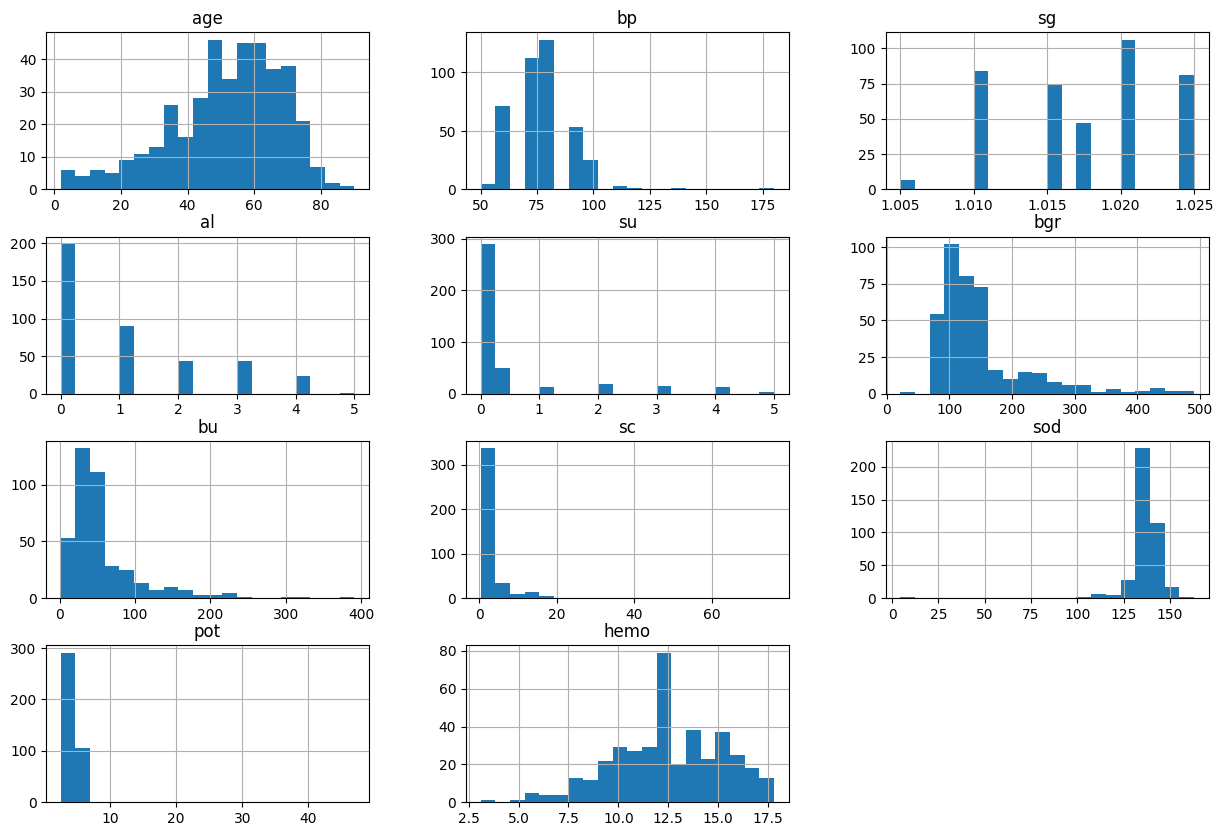

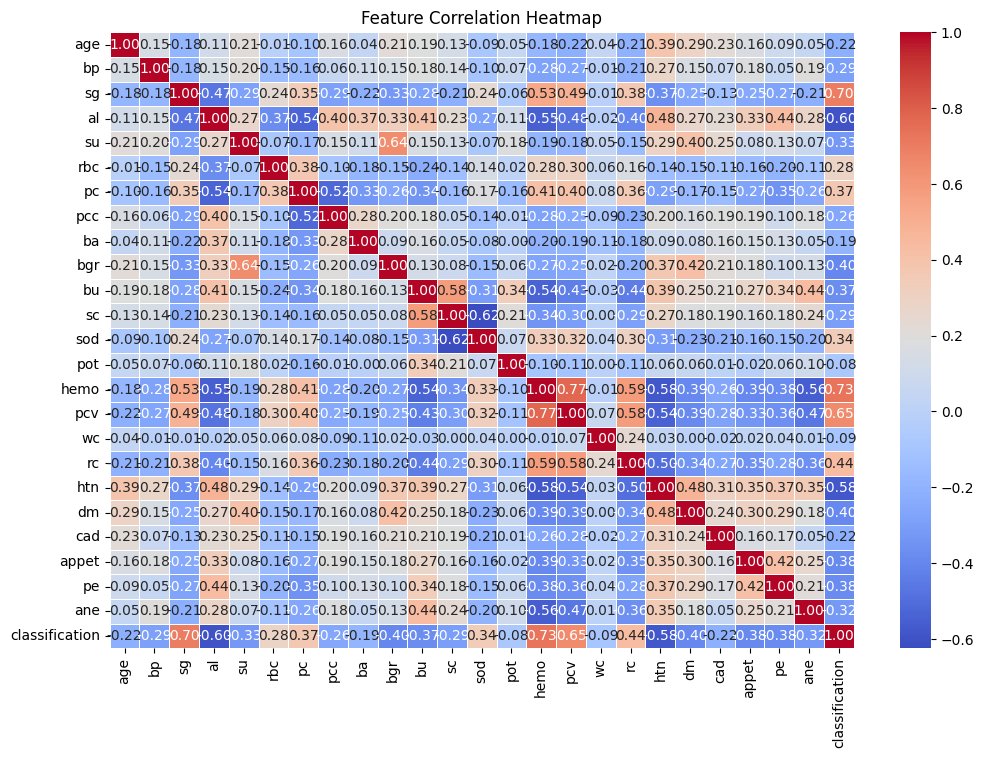

In [47]:

print("\n✅ Missing Values After Handling:")
print(df.isnull().sum())

### Exploratory Data Analysis (EDA)
# Summary statistics
print("\n🔹 Summary Statistics:\n", df.describe())

# Plot feature distributions
plt.figure(figsize=(15, 10))
df[numerical_cols].hist(bins=20, figsize=(15, 10), layout=(4, 3))
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [48]:
# Variance Threshold (Low Variance Feature Removal)
selector = VarianceThreshold(threshold=0.01)
df_selected = pd.DataFrame(selector.fit_transform(df), columns=df.columns[selector.get_support()])


In [49]:
# Compute Mutual Information (Categorical Features)


if 'classification' in df.columns:
    mi_scores = mutual_info_classif(df.drop(columns=['classification']), df['classification'])
    mi_df = pd.DataFrame({'Feature': df.drop(columns=['classification']).columns, 'MI Score': mi_scores})
    mi_df = mi_df.sort_values(by='MI Score', ascending=False)
    print("\n🔹 Mutual Information Scores:\n", mi_df)



🔹 Mutual Information Scores:
    Feature  MI Score
14    hemo  0.447886
11      sc  0.392025
15     pcv  0.388624
2       sg  0.383983
17      rc  0.336989
3       al  0.334329
19      dm  0.279808
12     sod  0.239451
18     htn  0.225793
13     pot  0.203751
10      bu  0.194587
9      bgr  0.185601
16      wc  0.142422
1       bp  0.131948
21   appet  0.130421
23     ane  0.122460
6       pc  0.113766
5      rbc  0.113090
20     cad  0.108719
4       su  0.098808
22      pe  0.073302
0      age  0.046018
7      pcc  0.033242
8       ba  0.031253


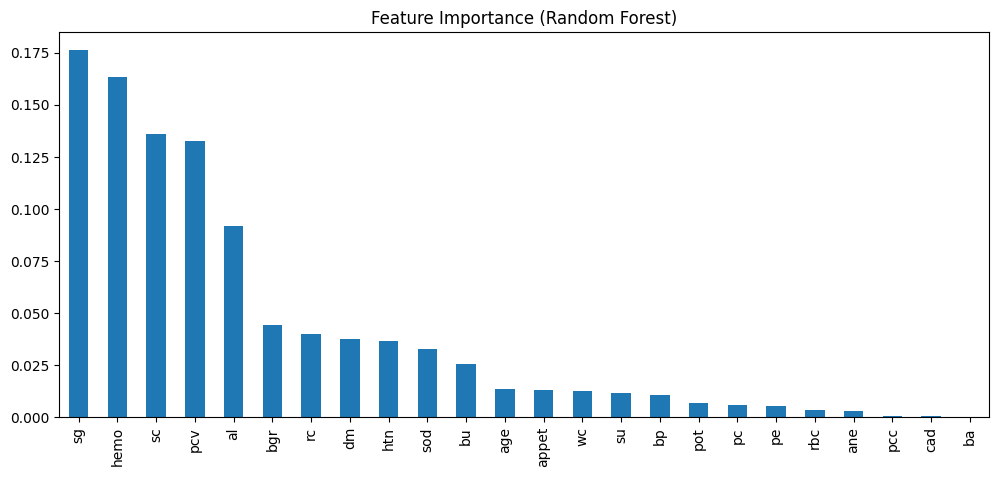

In [50]:
# Compute Mutual Information (Categorical Features)

# Feature Importance using Random Forest
if 'classification' in df.columns:
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(df.drop(columns=['classification']), df['classification'])
    feature_importance = pd.Series(model.feature_importances_, index=df.drop(columns=['classification']).columns)
    feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(12, 5), title="Feature Importance (Random Forest)")
    plt.show()

In [51]:
# VIF (Multicollinearity Check)
vif_data = pd.DataFrame()
vif_data["Feature"] = df_selected.columns
vif_data["VIF"] = [variance_inflation_factor(df_selected.values, i) for i in range(df_selected.shape[1])]
print("\n🔹 Variance Inflation Factor (VIF):\n", vif_data)


🔹 Variance Inflation Factor (VIF):
            Feature         VIF
0              age   13.353693
1               bp   37.135572
2               al    3.853070
3               su    2.190743
4              rbc   11.494989
5               pc   10.934307
6              pcc    1.788787
7               ba    1.346782
8              bgr    9.913312
9               bu    5.678468
10              sc    2.472637
11             sod  157.406208
12             pot    4.790903
13            hemo   87.413238
14             pcv   35.140955
15              wc    7.473951
16              rc   22.147190
17             htn    3.667691
18              dm   48.382787
19             cad   17.767097
20           appet    1.804315
21              pe    1.986132
22             ane    1.885540
23  classification    4.858225


Variance explained by each component:
 [0.29147669 0.36586219 0.43483779 0.48921885 0.54065909 0.58824886
 0.6322046  0.67218682 0.7108199  0.74426544]


In [59]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

pca = PCA(n_components=10 ) 
pca_result = pca.fit_transform(df_scaled)

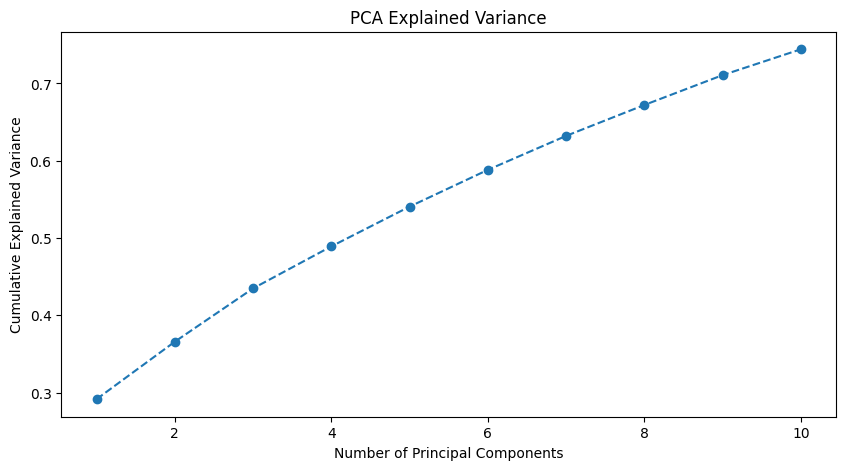


🔹 Explained Variance by PCA Components:
 [0.29147669 0.36586219 0.43483779 0.48921885 0.54065909 0.58824886
 0.6322046  0.67218682 0.7108199  0.74426544]

🔹 PCA Result (First 5 Rows):
         PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.623897  0.839478 -0.610376 -0.533526 -0.155390  0.095094  0.165729   
1  0.864225 -0.940022  1.152567 -0.128444  0.336658  1.271263  0.561998   
2 -2.558475  2.904702 -0.615839 -0.594518  1.269436 -0.242559  1.402251   
3 -4.134012 -2.189541  1.487625 -1.181488 -1.007308  0.847451 -1.026606   
4  0.451513 -0.411976 -0.010446 -0.445244  0.042770 -0.184645  0.609349   

        PC8       PC9      PC10  
0  0.004935  0.151789  0.080174  
1 -0.702714 -2.527624 -0.799365  
2  0.064879 -1.772221  1.277597  
3  1.771890 -2.098900  1.649422  
4  0.326197  0.080196 -0.561332  


In [60]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.show()

print("\n🔹 Explained Variance by PCA Components:\n", explained_variance)

# Convert PCA result into DataFrame
pca_df = pd.DataFrame(pca_result, columns=[f"PC{i+1}" for i in range(pca_result.shape[1])])
print("\n🔹 PCA Result (First 5 Rows):\n", pca_df.head())

In [61]:
pca_df 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0.623897,0.839478,-0.610376,-0.533526,-0.155390,0.095094,0.165729,0.004935,0.151789,0.080174
1,0.864225,-0.940022,1.152567,-0.128444,0.336658,1.271263,0.561998,-0.702714,-2.527624,-0.799365
2,-2.558475,2.904702,-0.615839,-0.594518,1.269436,-0.242559,1.402251,0.064879,-1.772221,1.277597
3,-4.134012,-2.189541,1.487625,-1.181488,-1.007308,0.847451,-1.026606,1.771890,-2.098900,1.649422
4,0.451513,-0.411976,-0.010446,-0.445244,0.042770,-0.184645,0.609349,0.326197,0.080196,-0.561332
...,...,...,...,...,...,...,...,...,...,...
395,2.508174,0.279956,0.074068,0.293915,0.382542,-0.877428,-0.315363,-0.094864,0.655688,0.090427
396,3.511973,-0.124365,0.098504,0.259068,-0.061222,0.701669,-0.350596,0.183754,0.218559,0.379698
397,3.044834,-0.702300,0.220590,0.406567,0.074958,0.343069,0.766468,-0.432238,-0.380668,0.715268
398,3.013997,-0.749320,0.051209,0.632878,0.143422,0.999053,-0.043682,-0.340191,-1.132807,0.241081
